# Python Programming - In-Class Assignment


Import necessary libraries and load the data

From kaggle (https://www.kaggle.com/datasets/yasserh/titanic-dataset):
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren't enough lifeboats for everyone on board, resulting in the death ofmore than half of the passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This exercise seeks to explore the factors that appeared to influence survival.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the 'titanic' dataset from seaborn
titanic_data = sns.load_dataset('titanic')

display(titanic_data.head())
print(titanic_data.shape)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


(891, 15)


Task 1: Calculate overall survival rate.

Hint: becausse 'survived' is 0 and 1, survival rate can be computed as the .mean() of that column

In [3]:
# Calculate overall survival rate
overall_survival_rate = titanic_data['survived'].mean()
print(f"Overall survival rate: {overall_survival_rate:.2f}")

Overall survival rate: 0.38


Task 2: Calculate and print the survival rates by gender/sex ('sex'), passenger class ('class'), and embarkation point ('embarked'; the location where the journey began).

Hint: the material showed us how to filter material, which can work here. Pandas dataframes also offers a convenient function groupby, that will take a one or a list of columns, and group the data by the values of that/those column(s). Operations (such as .mean()) on the returned item will be performed on each group.

Survival rate by sex:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


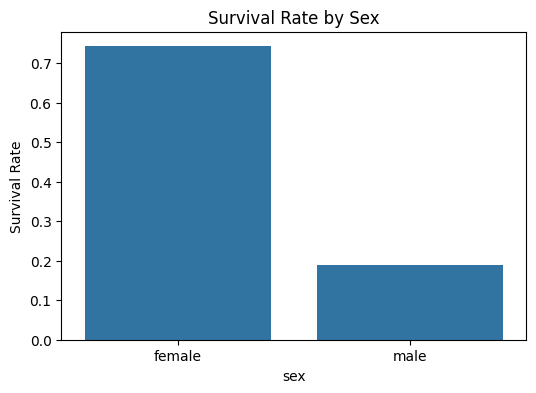

In [5]:
# Calculate survival rates by gender and visualize it
survival_rate_by_sex = titanic_data.groupby('sex')['survived'].mean()
print("Survival rate by sex:")
print(survival_rate_by_sex)

plt.figure(figsize=(6, 4))
sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()


Survival rate by passenger class:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


/tmp/ipython-input-1772628863.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_class = titanic_data.groupby('class')['survived'].mean()


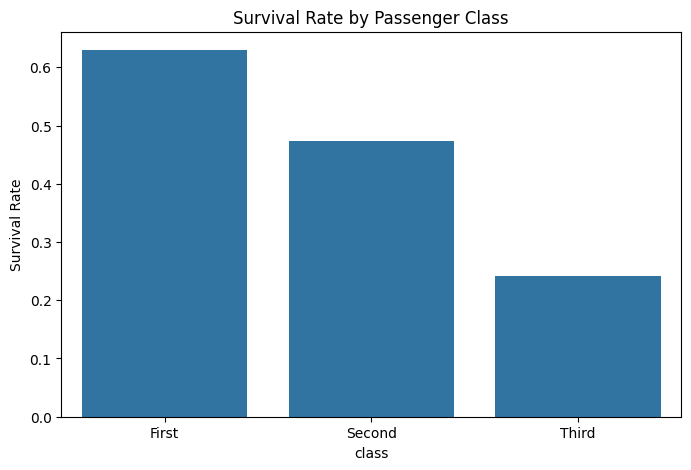

In [6]:
# Calculate survival rates by passenger class and visualize it
survival_rate_by_class = titanic_data.groupby('class')['survived'].mean()
print("\nSurvival rate by passenger class:")
print(survival_rate_by_class)

plt.figure(figsize=(8, 5))
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values, order=survival_rate_by_class.sort_values(ascending=False).index)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


Survival rate by embarkation point:
embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


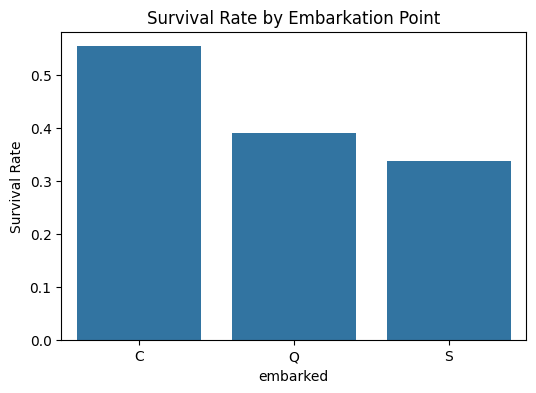

In [7]:
# Calculate survival rates by embarkation point and visualize it
survival_rate_by_embarked = titanic_data.groupby('embarked')['survived'].mean()
print("\nSurvival rate by embarkation point:")
print(survival_rate_by_embarked)

plt.figure(figsize=(6, 4))
sns.barplot(x=survival_rate_by_embarked.index, y=survival_rate_by_embarked.values)
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

Task 3: Calculate the survival rate by age group (under 12 as child, 13-20 as teen, 21-40 as adult, 41-60 as middle-aged, above 61 as senior).

In [8]:
# create a new column age_group based on the criteria above
bins = [0, 12, 20, 40, 60, np.inf]
labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels, right=True)

# Calculate survival rates by age group
survival_rate_by_age_group = titanic_data.groupby('age_group')['survived'].mean()
print("\nSurvival rate by age group:")
print(survival_rate_by_age_group)


Survival rate by age group:
age_group
Child          0.579710
Teen           0.381818
Adult          0.397403
Middle-Aged    0.390625
Senior         0.227273
Name: survived, dtype: float64


/tmp/ipython-input-3121484624.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = titanic_data.groupby('age_group')['survived'].mean()


Task 4: Create a box plot for age distribution by survival.

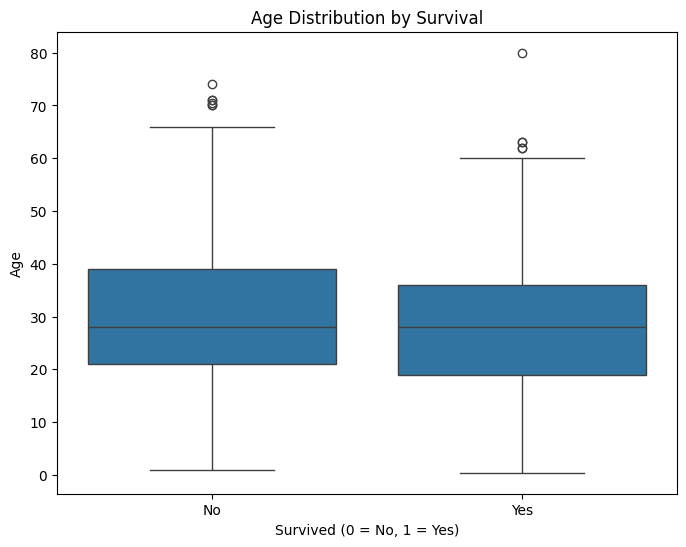

In [9]:
# Create a box plot for age distribution by survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Task 5: Create a stacked bar chart to visualize the distribution of Titanic passengers by class, using different colors to represent survival status within each class.
Hint: try creating a comment to do this one and use the AI to help. What is this code doing?

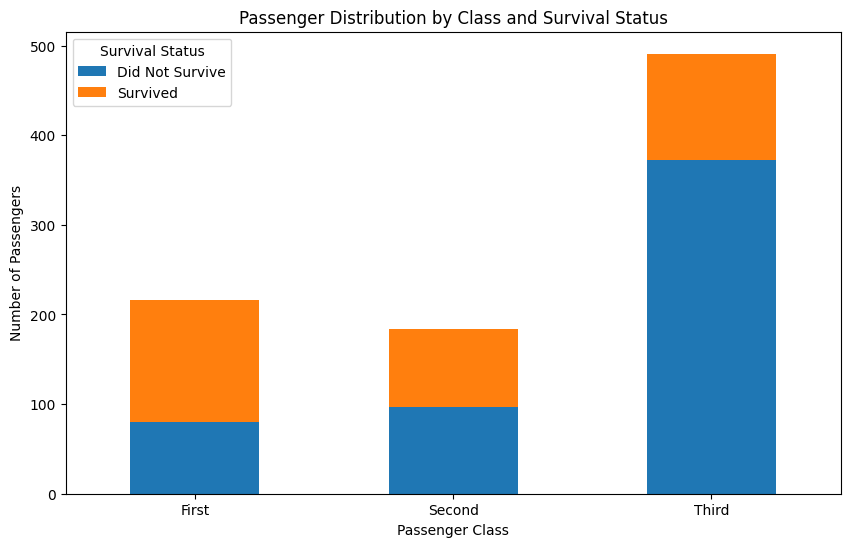

In [10]:
# Create a stacked bar chart to visualize the distribution of Titanic passengers by class
survived_by_class = titanic_data.groupby(['pclass', 'survived']).size().unstack()
survived_by_class.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Passenger Distribution by Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1, 2], labels=['First', 'Second', 'Third'], rotation=0)
plt.legend(['Did Not Survive', 'Survived'], title='Survival Status')
plt.show()

**Open-Ended Questions:** From our analysis, some more in-depth questions can be raised. Please discuss and attempt to answer them by using Python to perform data analysis and visualizations to support your claims. Keep in mind that there are no definitive answers to these questions.

Question 1: Given, from task 2, the survival rates by embarkation point are as follows:

| Embarkation Point | Survival Rate (%) |
|-------------------|--------------------|
| C                 | 55.36              |
| Q                 | 38.96              |
| S                 | 33.70              |

does this indicate that, if you will be on the Titanic, better to select Port C as your embarkation point for increasing the chances of survival?

**Your Q1 discussion here:** Based on the survival rates, it appears that embarking from Port C had a higher survival rate. However, the anaylsis in the previous step showed that a larger proportion of first-class passengerts had a significantly higher survival rate overall, this likely explains the higher survival rate from Port C. Therefore, simply selecting Port C would not guarantee a higher chance of survival, as the passenger class played a more significant role.

/tmp/ipython-input-1966270667.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_distribution_by_embarked = titanic_data.groupby(['embarked', 'class']).size().unstack()


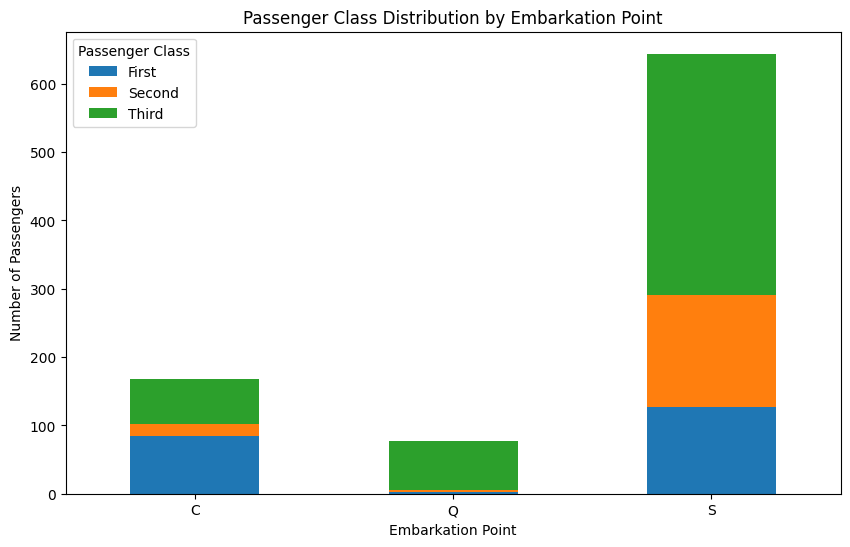

In [11]:
# Optional: if you have code to support your Q1 discussion, please add it here.

# Analyze passenger class distribution by embarkation point
class_distribution_by_embarked = titanic_data.groupby(['embarked', 'class']).size().unstack()

# Plot a stacked bar chart
class_distribution_by_embarked.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Passenger Class Distribution by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Passenger Class')
plt.show()

Question 2: Given, from task 3, the survival rates by age group are as follows:

| Age Group | Survival Rate (%) |
|-----------|--------------------|
| Child     | 57.97              |
| Teen      | 38.18              |
| Adult     | 39.74              |
| Middle-Aged| 39.06              |
| Senior    | 22.73              |

Does this indicate that senior passengers were less taken care of?



**Your Q2 discussion here:** While the data shows a lower survival rate for senior passengers, it's not necessarily an indication that they were "less taken care of." The survival rate was heavily influenced by passenger class, and it's possible that a higher proportion of senior passengers were in lower classes with lower overall survival rates. To investigate this further, we could analyze the distribution of senior passengers across different classes and compare their survival rates within each class, as shown in the output of the code cell above. This would give a clearer picture of whether age or class was a more significant factor in their survival.

In [13]:
# Optional: if you have code to support your Q2 discussion, please add it here.

# Filter for senior passengers
senior_passengers = titanic_data[titanic_data['age_group'] == 'Senior']

# Calculate survival rate of senior passengers by class
survival_rate_senior_by_class = senior_passengers.groupby('class')['survived'].mean()
print("\nSurvival rate of senior passengers by class:")
print(survival_rate_senior_by_class)

# You could also visualize this data
# plt.figure(figsize=(8, 5))
# sns.barplot(x=survival_rate_senior_by_class.index, y=survival_rate_senior_by_class.values)
# plt.title('Survival Rate of Senior Passengers by Passenger Class')
# plt.ylabel('Survival Rate')
# plt.show()


Survival rate of senior passengers by class:
class
First     0.214286
Second    0.333333
Third     0.200000
Name: survived, dtype: float64


/tmp/ipython-input-3794562688.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_senior_by_class = senior_passengers.groupby('class')['survived'].mean()


When you are done, make sure to submit your assignments in accordance with the instructions on canvas.